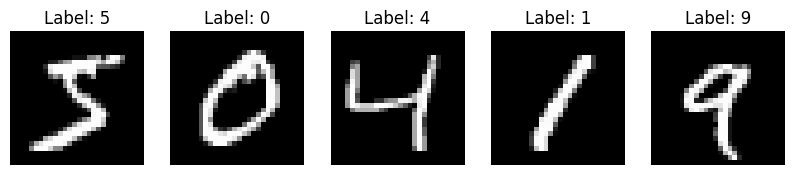

Sample image shape: (28, 28, 1)


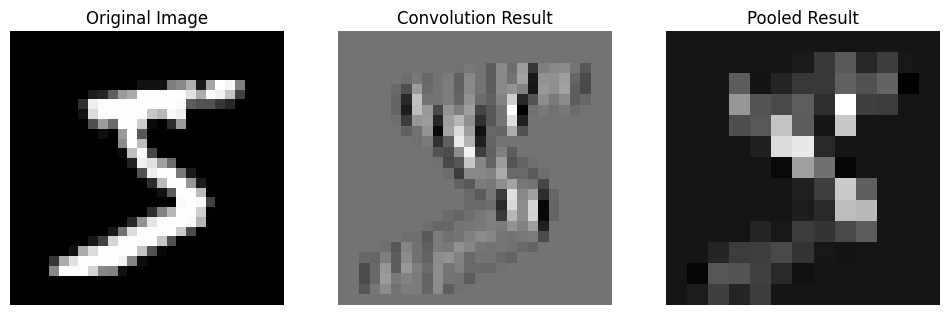

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

# Function to display images
def show_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title("Label: {}".format(labels[i]))
        plt.axis('off')
    plt.show()

# Display sample images from the dataset
show_images(train_images, train_labels)

print("Sample image shape:", sample_image.shape)

# Define convolution operation
def convolution(input_data, kernel):
    """
    Performs convolution operation on input_data with kernel.

    Args:
    input_data: Input data, a 3D NumPy array (height, width, channels).
    kernel: Convolution kernel, a 2D NumPy array.

    Returns:
    output: Output after convolution operation.
    """
    input_height, input_width, input_channels = input_data.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Initialize output
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(input_data[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output


# Define max pooling operation
def max_pooling(input_data, pool_size=(2, 2)):
    """
    Performs max pooling operation on input_data.

    Args:
    input_data: Input data, a 2D NumPy array (height, width).
    pool_size: Size of the pooling window, a tuple (pool_height, pool_width).

    Returns:
    output: Output after max pooling operation.
    """
    pool_height, pool_width = pool_size

    # Calculate output dimensions
    output_height = input_data.shape[0] // pool_height
    output_width = input_data.shape[1] // pool_width

    # Initialize output
    output = np.zeros((output_height, output_width))

    # Perform max pooling
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.max(input_data[i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width])

    return output


# Example usage
# Take a sample image from the dataset
sample_image = train_images[0]

# Define a simple convolution kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Perform convolution on the sample image
conv_result = convolution(sample_image, kernel)

# Perform max pooling on the convolution result
pooled_result = max_pooling(conv_result)

# Display original image, convolution result, and pooled result
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(conv_result, cmap='gray')
plt.title("Convolution Result")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pooled_result, cmap='gray')
plt.title("Pooled Result")
plt.axis('off')

plt.show()
